Pandas contains a fairly extensive set of tools for working with dates, times, and time-indexed data:

- ***Time stamps***: particular moments in time (e.g., July 4th, 2015 at 7:00am)
- ***Time intervals* and *periods***: a length of time between a particular beginning and end point; for example, the year 2015. 
  - Periods usually reference a special case of time intervals in which each interval is of **uniform** length and **does not overlap** (e.g., 24 hour-long periods comprising days).
-  ***Time deltas* or *durations***: an exact length of time (e.g., a duration of 22.56 seconds).


In [1]:
import pandas as pd
import numpy as np

## Dates and Times in Python

### Native Python dates and times: `datetime` and `dateutil`

Manually build a date:

In [2]:
from datetime import datetime

datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

Parse dates from a variety of string formats using `dateutil` module:

In [3]:
from dateutil import parser

date = parser.parse('4th of July, 2015')
date

datetime.datetime(2015, 7, 4, 0, 0)

Once we have a `datetime` object, we can do things like 

- printing the day of the week:

In [4]:
date.strftime('%A')

'Saturday'

### Typed arrays of times: Numpy's `datetime64`

In [5]:
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

Quickly do vectorized operations on it:

In [7]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

NumPy will infer the desired unit from the input:

In [8]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [9]:
np.datetime64('2015-07-04 13:00')

numpy.datetime64('2015-07-04T13:00')

Notice that the time zone is **automatically set to the local time** on the computer executing the code.

We can force any desired fundamental unit using one of many format codes:

In [10]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

Available format codes along with the relative and absolute timespans that Numpy `datetime64` can encode:



| Code | Meaning     | Time span (relative) | Time span (absolute)   |
| :--- | :---------- | :------------------- | :--------------------- |
| `Y`  | Year        | ± 9.2e18 years       | [9.2e18 BC, 9.2e18 AD] |
| `M`  | Month       | ± 7.6e17 years       | [7.6e17 BC, 7.6e17 AD] |
| `W`  | Week        | ± 1.7e17 years       | [1.7e17 BC, 1.7e17 AD] |
| `D`  | Day         | ± 2.5e16 years       | [2.5e16 BC, 2.5e16 AD] |
| `h`  | Hour        | ± 1.0e15 years       | [1.0e15 BC, 1.0e15 AD] |
| `m`  | Minute      | ± 1.7e13 years       | [1.7e13 BC, 1.7e13 AD] |
| `s`  | Second      | ± 2.9e12 years       | [ 2.9e9 BC, 2.9e9 AD]  |
| `ms` | Millisecond | ± 2.9e9 years        | [ 2.9e6 BC, 2.9e6 AD]  |
| `us` | Microsecond | ± 2.9e6 years        | [290301 BC, 294241 AD] |
| `ns` | Nanosecond  | ± 292 years          | [ 1678 AD, 2262 AD]    |
| `ps` | Picosecond  | ± 106 days           | [ 1969 AD, 1970 AD]    |
| `fs` | Femtosecond | ± 2.6 hours          | [ 1969 AD, 1970 AD]    |
| `as` | Attosecond  | ± 9.2 seconds        | [ 1969 AD, 1970 AD]    |

A useful default is `datetime64[ns]`, as it can encode a useful range of modern dates with a suitably fine precision. 

However, `datetime64` lacks many of the convenient methods and functions provided by `datetime` and especially `dateutil`. 

### Dates and times in Pands: best of bost worlds!

Pandas `Timestamp` object combines 

- the ease-of-use of `datetime` and `dateutil` with 
- the efficient storage and vectorized interface of `numpy.datetime64`.

From a group of these `Timestamp` objects, Pandas can construct a `DatetimeIndex` that can be used to index data in a `Series` or `DataFrame`.

In [11]:
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [12]:
date.strftime('%A')

'Saturday'

Additionally, we can do NumPy-style vectorized operations directly on this same object:

In [13]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## Panda Time Series: Indexing by Time

Useful when we begin to index data by timestamps.

In [18]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
index

DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'], dtype='datetime64[ns]', freq=None)

In [19]:
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

As this is a `Series`, we can make use of any of the `Series` patterns and methods

In [20]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

There are additional special date-only indexing operations, such as passing a year to obtain a slice of all data from that year:

In [21]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

## Pandas Time Series Data Structures

Fundamental Pandas data structures for working with time series data:

- For *time stamps*: `TimeStamp`
  - replacement for Python's native `datetime`
  - based on the more efficient `numpy.datetime64` data type.
  - associated Index structure: `DatetimeIndex`.
- For *time Periods*: `Period`
  - encodes a fixed-frequency interval based on `numpy.datetime64`
  - associated index structure: `PeriodIndex`.

- For *time deltas* or *durations*: `Timedelta`
  - more efficient replacement for Python's native `datetime.timedelta` type
  - based on `numpy.timedelta64`
  - associated index structure: `TimedeltaIndex`
  
It is more common to use the `pd.to_datetime()` function

- Passing a single date to `pd.to_datetime()` yields a `Timestamp`
- Passing a series of dates by default yields a `DatetimeIndex`

In [23]:
dates = pd.to_datetime([datetime(2015, 7, 3),
                        '4th of July, 2015',
                        '2015-Jul-6',
                        '07-07-2015',
                        '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Any `DatetimeIndex` can be converted to a `PeriodIndex` with the `to_period()` function with the addition of a frequency code. 

Here we'll use `'D'` to indicate daily frequency:

In [24]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

A `TimedeltaIndex` is created, for example, when a date is subtracted from another:

In [27]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### Regular sequences

To make the creation of regular date sequences more convenient, Pandas offers a few functions for this purpose:

- `pd.date_range()` for timestamps, 
- `pd.period_range()` for periods, and 
- `pd.timedelta_range()` for time deltas.

#### `pd.date_range()`

Similar to Pyhon's `range()` and Numpy's `np.arange()`, `pd.date_range()` accepts a start date, an end date, and an optional frequency code to create a regular sequence of dates. By default, the frequency is one day.

In [28]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

Alternatively, the date range can be specified with a startpoint and a number of periods:

In [29]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

The spacing can be modified by altering the freq argument, which defaults to `D` (Day).

In [30]:
# Construct a range of hourly timestamps
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

#### `pd.period_range()`

In [31]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

#### `pd.timedelta_range()`

In [35]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [46]:
pd.timedelta_range(0, periods=10, freq='D')

TimedeltaIndex(['0 days', '1 days', '2 days', '3 days', '4 days', '5 days',
                '6 days', '7 days', '8 days', '9 days'],
               dtype='timedelta64[ns]', freq='D')

In [39]:
pd.timedelta_range(0, periods=10, freq='T')

TimedeltaIndex(['00:00:00', '00:01:00', '00:02:00', '00:03:00', '00:04:00',
                '00:05:00', '00:06:00', '00:07:00', '00:08:00', '00:09:00'],
               dtype='timedelta64[ns]', freq='T')

## Frequencies and Offsets

Main codes of frequency or date offset:

| Code | Description  | Code | Description          |
| :--- | :----------- | :--- | :------------------- |
| `D`  | Calendar day | `B`  | Business day         |
| `W`  | Weekly       |      |                      |
| `M`  | Month end    | `BM` | Business month end   |
| `Q`  | Quarter end  | `BQ` | Business quarter end |
| `A`  | Year end     | `BA` | Business year end    |
| `H`  | Hours        | `BH` | Business hours       |
| `T`  | Minutes      |      |                      |
| `S`  | Seconds      |      |                      |
| `L`  | Milliseonds  |      |                      |
| `U`  | Microseconds |      |                      |
| `N`  | nanoseconds  |      |                      |

The monthly, quarterly, and annual frequencies are all marked at the end of the specified period. By adding an S suffix to any of these, they instead will be marked at the beginning:

| Code | Description   |      | Code  | Description            |
| :--- | :------------ | :--- | :---- | :--------------------- |
| `MS` | Month start   |      | `BMS` | Business month start   |
| `QS` | Quarter start |      | `BQS` | Business quarter start |
| `AS` | Year start    |      | `BAS` | Business year start    |

Additionally, you can change the month used to mark any quarterly or annual code by adding a three-letter month code as a suffix:

- `Q-JAN`, `BQ-FEB`, `QS-MAR`, `BQS-APR`, etc.
- `A-JAN`, `BA-FEB`, `AS-MAR`, `BAS-APR`, etc.

In the same way, the split-point of the weekly frequency can be modified by adding a three-letter weekday code:

- `W-SUN`, `W-MON`, `W-TUE`, `W-WED`, etc.

On top of this, codes can be combined with numbers to specify other frequencies. 

For example, for a frequency of 2 hours 30 minutes, we can combine the hour (`H`) and minute (`T`) codes as follows:

In [40]:
pd.timedelta_range(0, periods=9, freq='2H30T')

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

All of these short codes refer to specific instances of Pandas time series offsets, which can be found in the `pd.tseries.offsets` module.

In [42]:
# Create a business day offset directly
from pandas.tseries.offsets import BDay

pd.date_range('2015-07-01', periods=10, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
               '2015-07-13', '2015-07-14'],
              dtype='datetime64[ns]', freq='B')

## Resampling, shifting, and windowing

## Example: Visualizing Seattle Bicycle Counts

In [69]:
data = pd.read_csv('../data/Fremont_Bridge_Bicycle_Counter.csv',
                   index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [53]:
data.isnull().any()

Fremont Bridge Total            True
Fremont Bridge East Sidewalk    True
Fremont Bridge West Sidewalk    True
dtype: bool

In [54]:
data.dropna().describe()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,65678.000000,65678.000000,65678.000000
mean,113.397378,51.748302,61.649076
std,144.853108,66.803517,90.358214
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,147.000000,69.000000,74.000000
max,1097.000000,698.000000,850.000000


### Visualizing the data

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

Text(0, 0.5, 'Hourly bicycle Count')

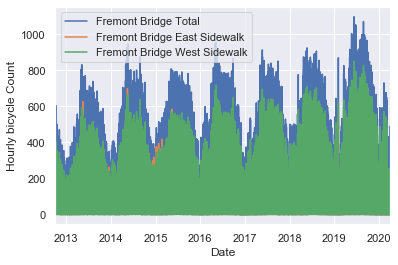

In [58]:
data.plot()
plt.ylabel('Hourly bicycle Count')

We can gain more insight by resampling the data to a coarser grid. Let's resample by week:

Text(0, 0.5, 'Weekly bicycle count')

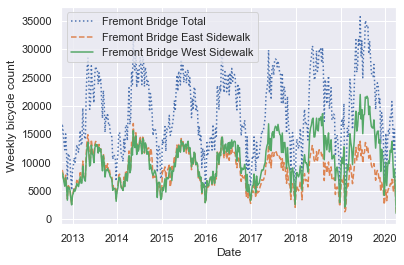

In [59]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')

This shows us some interesting seasonal trends: as you might expect, people bicycle more in the summer than in the winter, and even within a particular season the bicycle use varies from week to week (likely dependent on weather)

Another way that comes in handy for aggregating the data is to use a rolling mean, utilizing the `pd.rolling_mean()` function. Here we'll do a 30 day rolling mean of our data, making sure to center the window:

Text(0, 0.5, 'Mean hourly count')

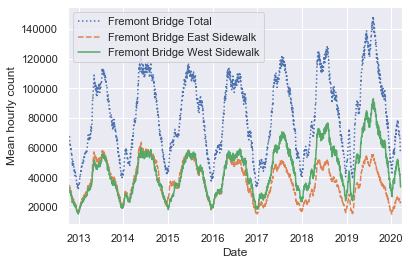

In [61]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('Mean hourly count')

We can get a smoother version of a rolling mean using a window function–for example, a Gaussian window. The following code specifies both the width of the window (we chose 50 days) and the width of the Gaussian within the window (we chose 10 days):

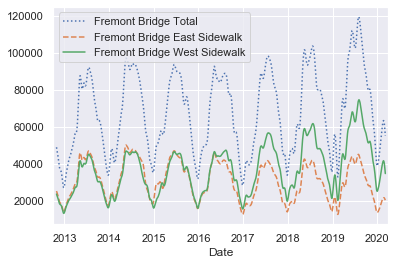

In [62]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])

### Digging into the data

While these smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure. 

For example, we might want to look at the average traffic as a function of the time of day. We can do this using the **GroupBy** functionality

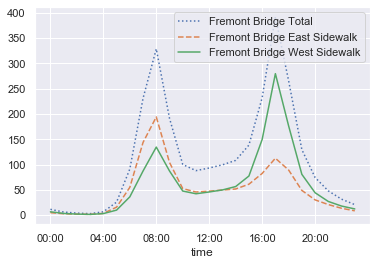

In [64]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])

- The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening. This is likely evidence of a strong component of commuter traffic crossing the bridge. 

- This is further evidenced by the differences between the western sidewalk (generally used going toward downtown Seattle), which peaks more strongly in the morning, and the eastern sidewalk (generally used going away from downtown Seattle), which peaks more strongly in the evening.

We also might be curious about how things change based on the day of the week.

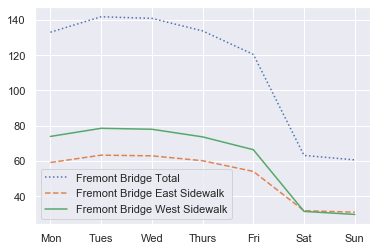

In [65]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'])

This shows a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

let's do a compound GroupBy and look at the hourly trend on weekdays versus weekends. 

We'll start by grouping by both a flag marking the weekend, and the time of day:

In [66]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

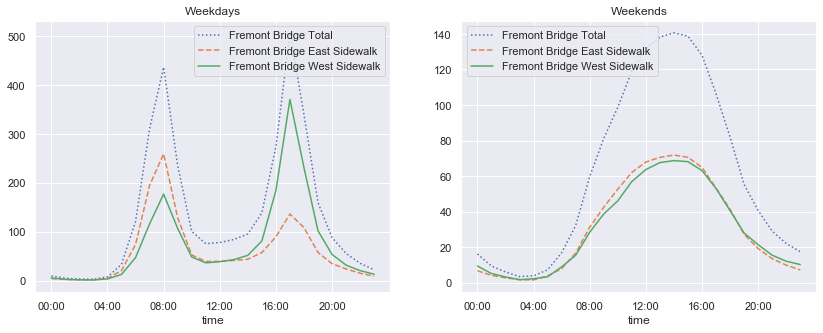

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);

The result is very interesting: we see a bimodal commute pattern during the work week, and a unimodal recreational pattern during the weekends. 